## Set up file structure


Here we mount our Google drive and set the current working directory to be in line with what the legacy code expects.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import sys
cwd = "/content/drive/MyDrive/Hybrid-CLUE/notebooks/train_models"
os.chdir(cwd)

In [ ]:
%matplotlib inline
N_up = 2
nb_dir = '/'.join(os.getcwd().split('/')[:-N_up])
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [ ]:
os.environ["CUDA_VISIBLE_DEVICES"]="0"

## train MNIST

First we load the MNIST dataset

In [ ]:
import torch
from torchvision import datasets, transforms

In [ ]:
# Load the MNIST dataset
trainset = datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])
)

valset = datasets.MNIST(
    root='./data',
    train=False,
    download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])
)

Next, we reload the BNN models

In [ ]:
import importlib # Import the importlib module
import BNN

from BNN.models import MLP
from BNN.wrapper import BNN_cat
from BNN.train import train_BNN_classification

importlib.reload(BNN.models)  # Contains MLP
importlib.reload(BNN.wrapper) # Contains BNN_cat
importlib.reload(BNN.train)  # Contains train_BNN_classification

from BNN.models import MLP
from BNN.wrapper import BNN_cat
from BNN.train import train_BNN_classification

We then define the model...

In [ ]:
%matplotlib inline
torch.cuda.empty_cache()  # Clear CUDA memory


dname = 'MNIST'
save_dir = '../saves/fc_BNN_' + dname


input_dim = 784
width = 1200
depth = 2
output_dim = 10
model = MLP(input_dim, width, depth, output_dim, flatten_image=False)

N_train = len(trainset)
print(N_train)
batch_size = 512#
nb_epochs = 625 # We can do less iterations as this method has faster convergence

lr = 0.5e-2

## weight saving parameters #######
burn_in = 15 # this is in epochs
sim_steps = 2 # We want less correlated samples -> despite having per minibatch noise we see correlations
N_saves = 300

resample_its = 10
resample_prior_its = 45
re_burn = 1e7

cuda = torch.cuda.is_available()
net = BNN_cat(model, N_train, lr=lr, cuda=cuda)

60000

Net:
BNN categorical output
    Total params: 2.40M


... and train!


Network:

Train:
  init cost variables:
it 0/625, Jtr_pred = 0.816041, err = 0.201567,    time: 4.842784 seconds

    Jdev = 0.297075, err = 0.084000

best test error
it 1/625, Jtr_pred = 0.272612, err = 0.077967,    time: 4.782992 seconds

    Jdev = 0.218077, err = 0.062500

best test error
it 2/625, Jtr_pred = 0.208125, err = 0.060067,    time: 4.335412 seconds

    Jdev = 0.191782, err = 0.057300

best test error
it 3/625, Jtr_pred = 0.178462, err = 0.051867,    time: 4.782970 seconds

    Jdev = 0.164526, err = 0.049300

best test error
it 4/625, Jtr_pred = 0.158621, err = 0.045933,    time: 4.557392 seconds

    Jdev = 0.164434, err = 0.050100

it 5/625, Jtr_pred = 0.142156, err = 0.042083,    time: 4.329628 seconds

    Jdev = 0.154982, err = 0.048800

best test error
it 6/625, Jtr_pred = 0.128858, err = 0.038667,    time: 4.672930 seconds

    Jdev = 0.142623, err = 0.043900

best test error
it 7/625, Jtr_pred = 0.124003, err = 0.037483,    time: 4.272191 seconds

    Jdev = 0

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7a12ad797eb0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
Exception ignored in: AssertionError<function _MultiProcessingDataLoaderIter.__del__ at 0x7a12ad797eb0>Exception ignored in: 
: Traceback (most recent call last):
<function _MultiProcessingDataLoaderIter.__del__ at 0x7a12ad797eb0>can only test a child process  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__

Traceback (most recent call last):
    
  File "/usr/local/lib/python3.10/dist-packages/tor

it 12/625, Jtr_pred = 0.102957, err = 0.032267,    time: 4.504459 seconds

    Jdev = 0.128885, err = 0.040400

it 13/625, Jtr_pred = 0.099538, err = 0.032217,    time: 4.670699 seconds

    Jdev = 0.126927, err = 0.038000

best test error
it 14/625, Jtr_pred = 0.087702, err = 0.028667,    time: 4.332487 seconds

    Jdev = 0.150431, err = 0.043000

it 15/625, Jtr_pred = 0.089574, err = 0.028517,    time: 4.336443 seconds

    Jdev = 0.172196, err = 0.050100

it 16/625, Jtr_pred = 0.091070, err = 0.029850,    time: 4.636147 seconds

 saving weight samples 1/300
    Jdev = 0.161709, err = 0.044900

it 17/625, Jtr_pred = 0.082431, err = 0.026800,    time: 4.358745 seconds

    Jdev = 0.149300, err = 0.046100

it 18/625, Jtr_pred = 0.081948, err = 0.026417,    time: 4.602684 seconds

 saving weight samples 2/300
    Jdev = 0.130890, err = 0.038100

it 19/625, Jtr_pred = 0.080127, err = 0.026600,    time: 4.262280 seconds

    Jdev = 0.132230, err = 0.038000

it 20/625, Jtr_pred = 0.076543

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7a12ad797eb0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


    Jdev = 0.144266, err = 0.042600

it 70/625, Jtr_pred = 0.074389, err = 0.024083,    time: 4.582055 seconds

 saving weight samples 28/300
    Jdev = 0.111454, err = 0.030400

best test error
it 71/625, Jtr_pred = 0.074424, err = 0.024250,    time: 4.276935 seconds

    Jdev = 0.142326, err = 0.042600

it 72/625, Jtr_pred = 0.071367, err = 0.023833,    time: 4.735344 seconds

 saving weight samples 29/300
    Jdev = 0.126894, err = 0.037100

it 73/625, Jtr_pred = 0.073282, err = 0.024500,    time: 4.306041 seconds

    Jdev = 0.111116, err = 0.032300

it 74/625, Jtr_pred = 0.073487, err = 0.024217,    time: 4.301773 seconds

 saving weight samples 30/300
    Jdev = 0.122813, err = 0.038700

it 75/625, Jtr_pred = 0.070565, err = 0.023300,    time: 4.533524 seconds

    Jdev = 0.130215, err = 0.040400

it 76/625, Jtr_pred = 0.074446, err = 0.024267,    time: 4.235385 seconds

 saving weight samples 31/300
    Jdev = 0.117496, err = 0.035700

it 77/625, Jtr_pred = 0.072482, err = 0.024

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7a12ad797eb0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


    Jdev = 0.105650, err = 0.031400

it 79/625, Jtr_pred = 0.076222, err = 0.024617,    time: 4.271590 seconds

    Jdev = 0.118942, err = 0.036400

it 80/625, Jtr_pred = 0.074856, err = 0.024500,    time: 4.579970 seconds

 saving weight samples 33/300


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7a12ad797eb0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


    Jdev = 0.123212, err = 0.038500

it 81/625, Jtr_pred = 0.078637, err = 0.025900,    time: 4.159197 seconds

    Jdev = 0.110085, err = 0.035200

it 82/625, Jtr_pred = 0.073176, err = 0.024217,    time: 4.490158 seconds

 saving weight samples 34/300
    Jdev = 0.109874, err = 0.032200

it 83/625, Jtr_pred = 0.076708, err = 0.025217,    time: 4.202569 seconds

    Jdev = 0.121010, err = 0.037100

it 84/625, Jtr_pred = 0.075521, err = 0.024800,    time: 4.207670 seconds

 saving weight samples 35/300
    Jdev = 0.138759, err = 0.041700

it 85/625, Jtr_pred = 0.074555, err = 0.024150,    time: 4.483762 seconds

    Jdev = 0.133471, err = 0.039200

it 86/625, Jtr_pred = 0.077740, err = 0.025717,    time: 4.270276 seconds

 saving weight samples 36/300
    Jdev = 0.111813, err = 0.033400

it 87/625, Jtr_pred = 0.076732, err = 0.025450,    time: 4.502527 seconds

    Jdev = 0.127250, err = 0.038800

it 88/625, Jtr_pred = 0.081999, err = 0.026333,    time: 4.360079 seconds

 saving weight

<Figure size 640x480 with 0 Axes>

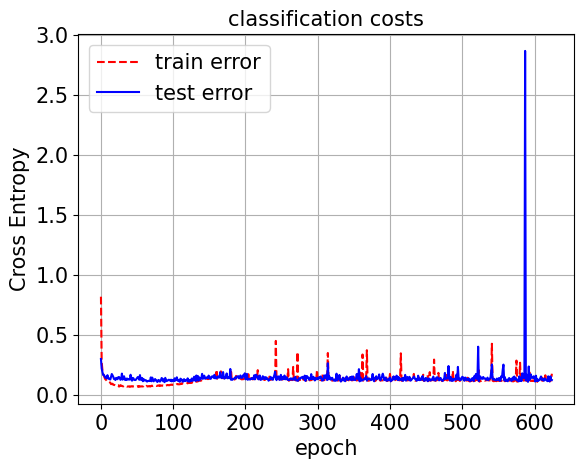

<Figure size 640x480 with 0 Axes>

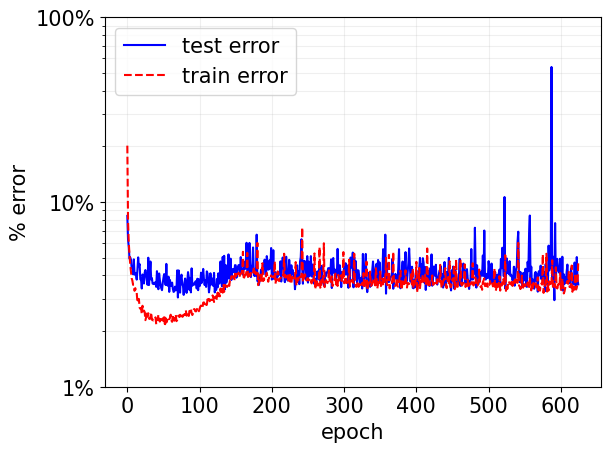

In [ ]:
cost_train, cost_dev, err_train, err_dev = train_BNN_classification(net, save_dir, batch_size,
                         nb_epochs, trainset, valset, cuda,
                         burn_in, sim_steps, N_saves, resample_its, resample_prior_its,
                         re_burn, flat_ims=True)

Load weights

In [12]:
net.load_weights(save_dir + '_models/state_dicts.pkl')

### Evaluate test log like

In [13]:
import numpy as np
import torch.nn.functional as F
batch_size = 1024

if cuda:
    valloader = torch.utils.data.DataLoader(valset, batch_size=batch_size, shuffle=False, pin_memory=True, num_workers=4)

else:
    valloader = torch.utils.data.DataLoader(valset, batch_size=batch_size, shuffle=False, pin_memory=False,
                                            num_workers=4)
test_cost = 0  # Note that these are per sample
test_err = 0
nb_samples = 0
test_predictions = np.zeros((10000, 10))


for j, (x, y) in enumerate(valloader):
    y = y.cuda()
    x = x.view(x.shape[0], -1)
    probs_samples = net.sample_predict(x, Nsamples=0, grad=False).data
    probs = probs_samples.mean(dim=0)

    log_probs = torch.log(probs)
    loss = F.nll_loss(log_probs, y, reduction='sum')
    pred = probs.data.max(dim=1, keepdim=False)[1]  # get the index of the max log-probability
    err = pred.ne(y.data).sum()

    test_cost += loss.item()
    test_err += err.cpu().numpy()
    nb_samples += len(x)

# test_cost /= nb_samples
test_err /= nb_samples
print('Loglike = %6.6f, err = %1.6f\n' % (-test_cost, test_err))




Loglike = -1003.393452, err = 0.023000



In [ ]:
print('b', '    Loglike = %6.6f, err = %1.6f\n' % (-test_cost, test_err))

b     Loglike = -13486.823120, err = 0.020200



In [14]:
from BNN.evaluate import evaluate_uncertainty_accuracy
batch_size = 1024
valloader = torch.utils.data.DataLoader(valset, batch_size=batch_size, shuffle=False,
                                      pin_memory=cuda, num_workers=4)

# Evaluate model uncertainty and calibration
brier_score = evaluate_uncertainty_accuracy(net, valloader, samples=10, flat_ims=True)

Brier Score: 0.037044399344138564


ValueError: y_true takes value in {0, 1, 2, 3, 4, 5, 6, 7, 8, 9} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.

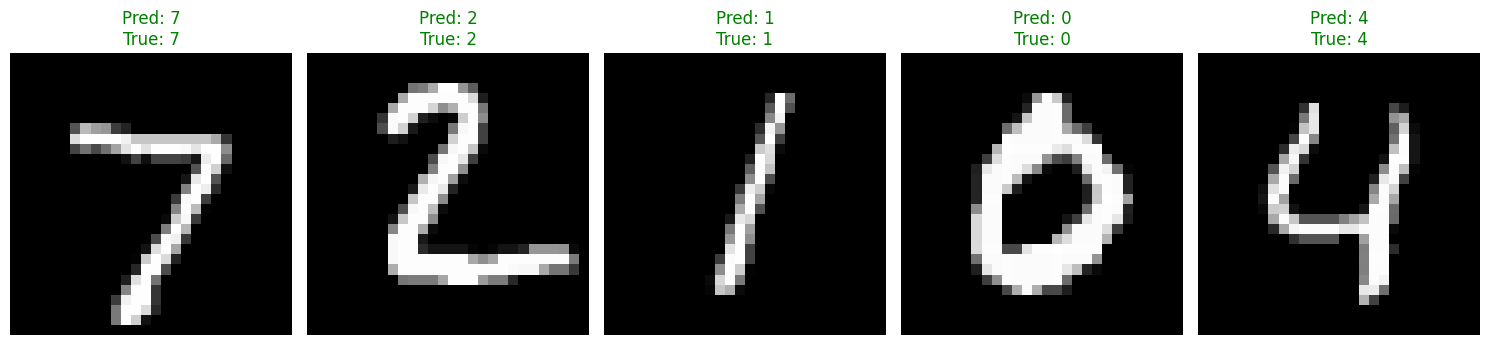


Confidence scores (probabilities) for these predictions:

Image 1:
True label: 7
Predicted probabilities:
  Digit 0: 0.085
  Digit 1: 0.085
  Digit 2: 0.085
  Digit 3: 0.085
  Digit 4: 0.085
  Digit 5: 0.085
  Digit 6: 0.085
  Digit 7: 0.232
  Digit 8: 0.085
  Digit 9: 0.085

Image 2:
True label: 2
Predicted probabilities:
  Digit 0: 0.086
  Digit 1: 0.086
  Digit 2: 0.230
  Digit 3: 0.085
  Digit 4: 0.085
  Digit 5: 0.085
  Digit 6: 0.086
  Digit 7: 0.085
  Digit 8: 0.085
  Digit 9: 0.085

Image 3:
True label: 1
Predicted probabilities:
  Digit 0: 0.086
  Digit 1: 0.225
  Digit 2: 0.087
  Digit 3: 0.086
  Digit 4: 0.086
  Digit 5: 0.086
  Digit 6: 0.086
  Digit 7: 0.086
  Digit 8: 0.087
  Digit 9: 0.086

Image 4:
True label: 0
Predicted probabilities:
  Digit 0: 0.232
  Digit 1: 0.085
  Digit 2: 0.085
  Digit 3: 0.085
  Digit 4: 0.085
  Digit 5: 0.085
  Digit 6: 0.085
  Digit 7: 0.085
  Digit 8: 0.085
  Digit 9: 0.085

Image 5:
True label: 4
Predicted probabilities:
  Digit 0: 0.087


In [ ]:
import matplotlib.pyplot as plt
import torch
import numpy as np

# Get some test examples
dataiter = iter(valloader)
images, labels = next(dataiter)  # Gets the next batch

# Make predictions (we know images should be flattened since flat_ims=True was used in training)
images_flat = images.view(images.shape[0], -1)  # Always flatten
with torch.no_grad():
    outputs = net.predict(images_flat)
    predictions = outputs.argmax(dim=1)

# Plot results
fig = plt.figure(figsize=(15, 5))
for i in range(5):  # Show first 5 images
    # Plot image
    plt.subplot(1, 5, i + 1)
    plt.imshow(images[i].squeeze(), cmap='gray')
    plt.axis('off')

    # Add title showing prediction and true label
    color = 'green' if predictions[i] == labels[i] else 'red'
    plt.title(f'Pred: {predictions[i].item()}\nTrue: {labels[i].item()}',
              color=color)

plt.tight_layout()
plt.show()

# Print confidence scores for these predictions
print("\nConfidence scores (probabilities) for these predictions:")
probs = torch.nn.functional.softmax(outputs, dim=1)
for i in range(5):
    print(f"\nImage {i+1}:")
    print(f"True label: {labels[i].item()}")
    print(f"Predicted probabilities:")
    for digit, prob in enumerate(probs[i]):
        if prob > 0.01:  # Only show probabilities > 1%
            print(f"  Digit {digit}: {prob:.3f}")

# Train modified MNISt for human subject experiment

In [ ]:
from src.modified_dset_loaders  import get_mod_479_MNIST

In [ ]:
%matplotlib inline
import torch
from torchvision import datasets, transforms
from BNN.models import MLP
from BNN.wrapper import BNN_cat
from BNN.train import train_BNN_classification

dname = 'MNIST_mod479'
save_dir = '../saves/fc_BNN_' + dname

transform_train = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.1307,), std=(0.3081,))
])

mod_trainset, mod_valset = get_mod_479_MNIST(root='../data', transforms=transform_train)

input_dim = 784
width = 1200
depth = 2
output_dim = 3
model = MLP(input_dim, width, depth, output_dim, flatten_image=False)

N_train = len(mod_trainset)
batch_size = 512#
nb_epochs = 1300 # We can do less iterations as this method has faster convergence

lr = 1e-2

## weight saving parameters #######
burn_in = 30 # this is in epochs
sim_steps = 4 # We want less correlated samples -> despite having per minibatch noise we see correlations
N_saves = 300

resample_its = 10
resample_prior_its = 50
re_burn = 1e7

nb_its_dev = 2

cuda = torch.cuda.is_available()
net = BNN_cat(model, N_train, lr=lr, cuda=cuda, grad_std_mul=20)


cost_train, cost_dev, err_train, err_dev = train_BNN_classification(net, save_dir, batch_size,
                         nb_epochs, mod_trainset, mod_valset, cuda,
                         burn_in, sim_steps, N_saves, resample_its, resample_prior_its,
                         re_burn, flat_ims=True, nb_its_dev=nb_its_dev)

torch.cuda.empty_cache()
net.load_weights(save_dir + '_models/state_dicts.pkl')




left dset size 18056
left testset size 3019
('N prototypes 4', 41)
('N prototypes 7', 47)


/opt/conda/conda-bld/pytorch_1573049314581/work/aten/src/ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.
/opt/conda/conda-bld/pytorch_1573049314581/work/aten/src/ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.


('prev Ntrain, ', 18056)
('post Ntrain, ', 17236)

Net:
BNN categorical output
    Total params: 2.39M


In [ ]:
import numpy as np
import torch.nn.functional as F
batch_size = 1024

if cuda:
    valloader = torch.utils.data.DataLoader(mod_valset, batch_size=batch_size, shuffle=False, pin_memory=True, num_workers=4)

else:
    valloader = torch.utils.data.DataLoader(mod_valset, batch_size=batch_size, shuffle=False, pin_memory=False,
                                            num_workers=4)
test_cost = 0  # Note that these are per sample
test_err = 0
nb_samples = 0
test_predictions = np.zeros((10000, 10))


for j, (x, y) in enumerate(valloader):
    y = y.cuda()
    x = x.view(x.shape[0], -1)
    probs_samples = net.sample_predict(x, Nsamples=0, grad=False).data
    probs = probs_samples.mean(dim=0)

    log_probs = torch.log(probs)
    loss = F.nll_loss(log_probs, y, reduction='sum')
    pred = probs.data.max(dim=1, keepdim=False)[1]  # get the index of the max log-probability
    err = pred.ne(y.data).sum()

    test_cost += loss.item()
    test_err += err.cpu().numpy()
    nb_samples += len(x)

# test_cost /= nb_samples
test_err /= nb_samples
print('Loglike = %6.6f, err = %1.6f\n' % (-test_cost, test_err))




Loglike = -137.118765, err = 0.000000

